#**Aim:** Colour Image Segmentation using clustering techniques

#**Theory:**
##**Color Image Segmentation:**
Color Image Segmentation
Color image segmentation is a critical operation in the fields of computer vision and image processing. The purpose of segmentation is to partition an image into meaningful regions that are easier to analyze. These regions typically represent different objects or areas within the image that share similar properties, such as color. By segmenting an image, you can focus on specific parts of the image for further analysis, making tasks like object detection, image retrieval, and scene understanding more manageable and accurate.

**Clustering Techniques in Image Segmentation**
Clustering is one of the most effective and widely used techniques for color image segmentation. In clustering, pixels within the image are grouped together based on similarities in their color properties. Each cluster represents a region in the image where the pixels share similar color characteristics. The goal is to group the pixels in such a way that pixels within the same cluster are more similar to each other than to those in other clusters.



**Color Spaces**
Before diving into clustering techniques, it’s important to understand color spaces, as the choice of color space can impact the effectiveness of the segmentation process. Common color spaces include:

RGB (Red, Green, Blue): The most common color space, where colors are represented by varying intensities of red, green, and blue light.
HSV (Hue, Saturation, Value): A cylindrical color model that separates the color information (hue) from intensity (value) and saturation (purity of color).
Lab: A color space that is designed to be more perceptually uniform, meaning that changes in the values correspond more closely to changes in human visual perception.
Clustering techniques operate within these color spaces to group pixels with similar color values into clusters.

**K-Means Clustering**
K-Means clustering is one of the most commonly used unsupervised learning algorithms for partitioning a dataset into K distinct clusters. In the context of color image segmentation, K-Means treats each pixel in the image as a data point, and its color values (often represented in RGB or Lab color space) are the features used for clustering.

Step-by-Step Process of K-Means Clustering:
Choose the Number of Clusters (K):

The first step is to decide the number of clusters, K, that you want to divide the image into. The choice of K can be based on prior knowledge of the image, experimentation, or the specific application.
Initial Assignment:

Randomly assign each pixel (data point) in the image to one of the K clusters. This initial assignment can be completely random or based on some heuristic.
Calculate Cluster Centers:

Once the initial assignments are made, calculate the center (also called the centroid) of each cluster. The center is the mean of all the data points (pixels) currently assigned to that cluster. In terms of color image segmentation, this means computing the average color of all the pixels in each cluster.
Distance Calculation:

For each pixel in the image, calculate the distance between the pixel’s color value and the center of each cluster. The distance is typically calculated using Euclidean distance, which is the square root of the sum of the squared differences between the pixel’s color values and the cluster center’s color values.

**Reassign Data Points:**

Reassign each pixel to the cluster whose center is closest to it, based on the distance calculation. This step effectively redefines the clusters, as some pixels may switch from one cluster to another.
Recompute Cluster Centers:

After reassigning the pixels, recalculate the center of each cluster. The new centers are the mean color values of the pixels currently assigned to that cluster.
Iteration:

Repeat steps 4 through 6 until the cluster assignments no longer change (i.e., convergence) or until a predefined number of iterations is reached. Convergence occurs when pixels no longer switch clusters, meaning the algorithm has found a stable solution.
Output:

The final output is a segmented image where each pixel is labeled according to the cluster it belongs to. Each cluster represents a distinct region in the image, and the pixels within a cluster have similar color characteristics.
Advantages of K-Means Clustering in Image Segmentation:
Simplicity: K-Means is relatively easy to understand and implement, making it a popular choice for image segmentation.
Speed: The algorithm is computationally efficient, especially for smaller values of K, and can handle large datasets effectively.
Flexibility: K-Means can be applied to various types of data and in different color spaces, providing flexibility in handling different kinds of images.
Challenges and Considerations:
Choice of K: Selecting the appropriate number of clusters is critical and can significantly impact the quality of the segmentation. Too few clusters may result in under-segmentation, while too many clusters can lead to over-segmentation.
Initialization Sensitivity: The initial assignment of pixels to clusters can affect the final outcome. Poor initialization may lead to suboptimal clustering results.
Convergence to Local Minima: K-Means may converge to a local minimum, meaning that the solution might not be globally optimal. This is often mitigated by running the algorithm multiple times with different initializations and choosing the best result.
Applications of Color Image Segmentation:
Object Recognition: Segmented regions can be used to identify and classify objects within an image.
Medical Imaging: Segmentation is used to highlight and analyze specific regions, such as tumors in medical scans.
Image Editing: Segmentation allows for the isolation of specific parts of an image for editing or enhancement.
Scene Understanding: In computer vision, segmentation helps in interpreting the structure and content of a scene by identifying and separating different objects and regions.



In [142]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
img = cv2.imread("/content/drive/MyDrive/colab for cvr/clown_fish.png")

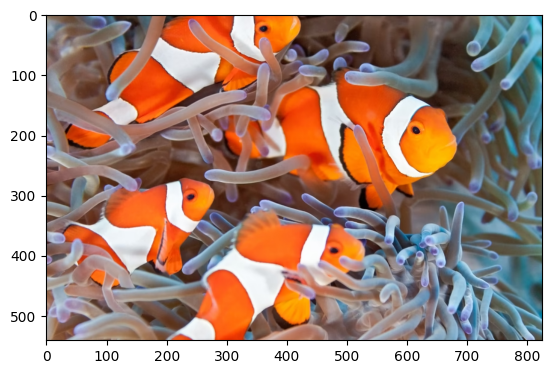

In [145]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [146]:
data = img_rgb.reshape((-1,3))
data = np.float32(data)

In [147]:
k = 4

In [148]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [149]:
compact, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [150]:
compact

955740813.161219

In [151]:
labels

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [2]], dtype=int32)

In [152]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [153]:
centers

array([[140.58997 , 137.225   , 143.51938 ],
       [235.60968 ,  98.84969 ,  22.368818],
       [ 89.71638 ,  71.36456 ,  63.839603],
       [215.40239 , 219.80083 , 226.46294 ]], dtype=float32)

In [154]:
segmented_labels = labels.reshape(img_rgb.shape[0], img_rgb.shape[1])

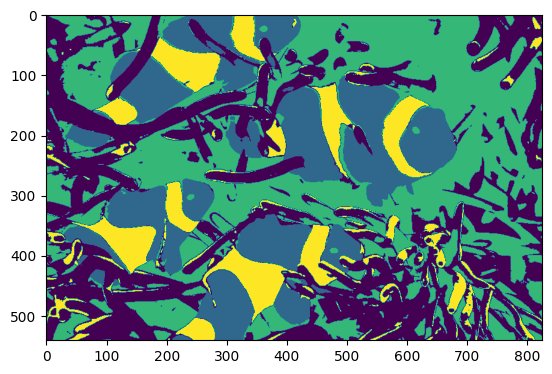

In [155]:
plt.imshow(segmented_labels)

In [156]:
cluster_masks = []
for i in range(k):
  mask = (segmented_labels == i)
  cluster_masks.append(mask)

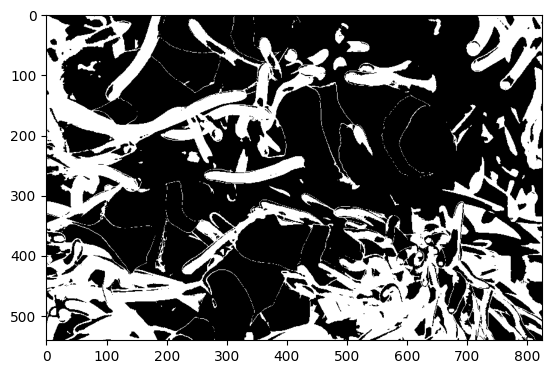

In [157]:
plt.imshow(cluster_masks[0],cmap='gray')

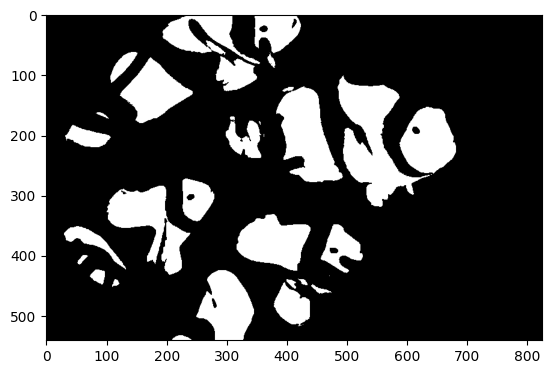

In [158]:
plt.imshow(cluster_masks[1],cmap='gray')

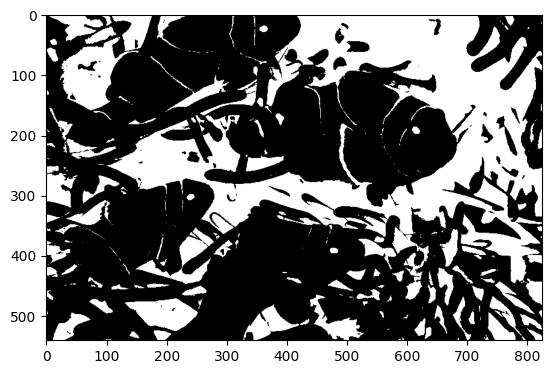

In [159]:
plt.imshow(cluster_masks[2],cmap='gray')

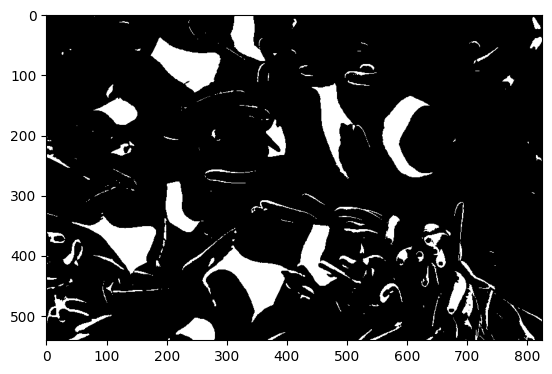

In [160]:
plt.imshow(cluster_masks[3],cmap='gray')

In [161]:
cluster_mask_img = []
for i, mask in enumerate(cluster_masks):
  cluster_color = centers[i]
  cluster_mask_rgb = np.zeros_like(img_rgb)
  cluster_mask_rgb[mask] = cluster_color
  cluster_mask_img.append(cluster_mask_rgb)

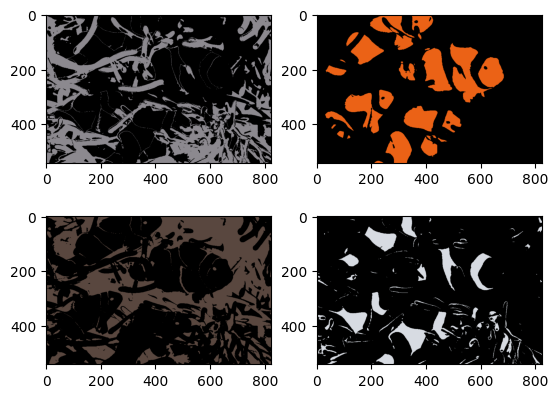

In [162]:
plt.subplot(2,2,1)
plt.imshow(cluster_mask_img[0])
plt.subplot(2,2,2)
plt.imshow(cluster_mask_img[1])
plt.subplot(2,2,3)
plt.imshow(cluster_mask_img[2])
plt.subplot(2,2,4)
plt.imshow(cluster_mask_img[3])

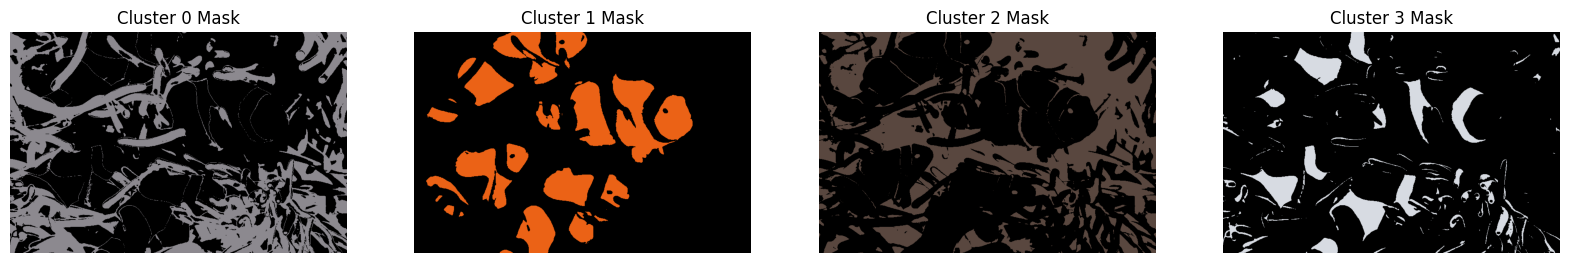

In [163]:
plt.figure(figsize=(20,20))
for i, mask_img in enumerate(cluster_mask_img):
  plt.subplot(1,k,i+1)
  plt.imshow(mask_img)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

In [164]:
merged_mask = cluster_masks[0] | cluster_masks[1]
merged_mask_rgb = np.zeros_like(img_rgb)
merged_mask_rgb[merged_mask] = img_rgb[merged_mask]

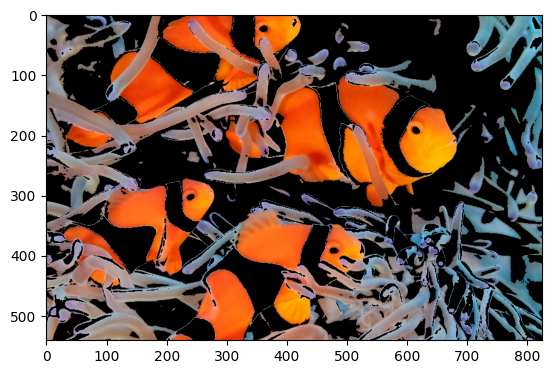

In [165]:
plt.imshow(merged_mask_rgb)

#**Task**

1. Import image "Bird_segmentation.png" image using cv2

In [166]:
bird = cv2.imread("/content/drive/MyDrive/colab for cvr/Bird_segmentation.jpg")

2. Convert image from BGR to RGB

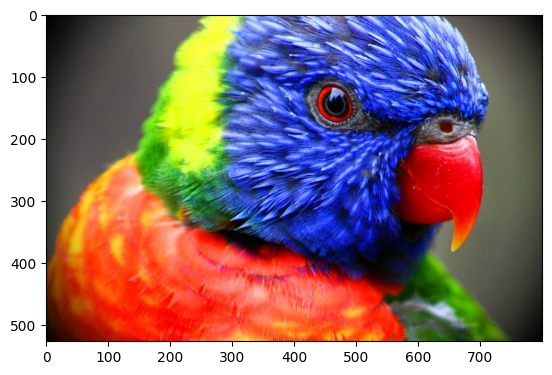

In [167]:
bird_rgb = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)
plt.imshow(bird_rgb)

3. Separate the Bird region from the image using clustering segmentation approach.

In [168]:
data1 = bird_rgb.reshape((-1,3))
data1 = np.float32(data1)

In [169]:
k = 4

In [170]:
criteria1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [171]:
compact1, labels1, centers1 = cv2.kmeans(data1, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [172]:
segmented_labels1 = labels1.reshape(bird_rgb.shape[0], bird_rgb.shape[1])

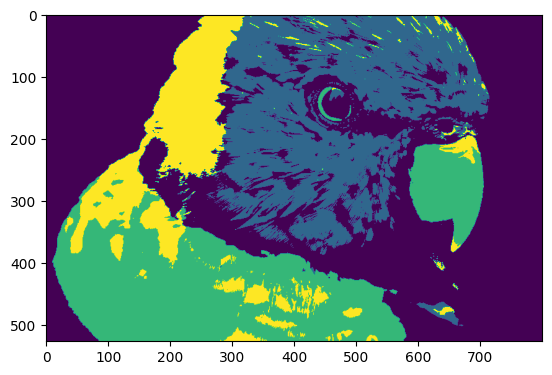

In [173]:
plt.imshow(segmented_labels1)

In [174]:
cluster_masks1 = []
for i in range(k):
  mask1 = (segmented_labels1 == i)
  cluster_masks1.append(mask1)

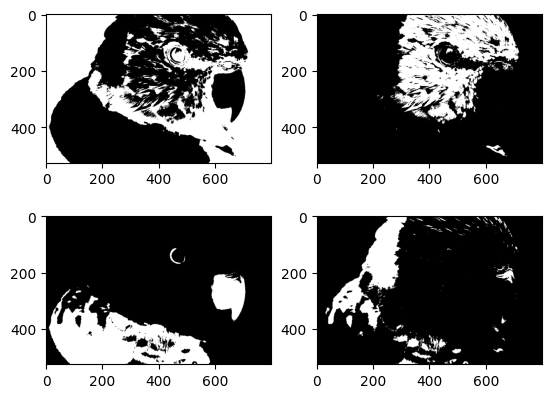

In [175]:
plt.subplot(2,2,1)
plt.imshow(cluster_masks1[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(cluster_masks1[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(cluster_masks1[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(cluster_masks1[3], cmap='gray')

In [176]:
cluster_mask_img1 = []
for i, mask in enumerate(cluster_masks1):
  cluster_color1 = centers1[i]
  cluster_mask_rgb1 = np.zeros_like(bird_rgb)
  cluster_mask_rgb1[mask] = cluster_color1
  cluster_mask_img1.append(cluster_mask_rgb1)

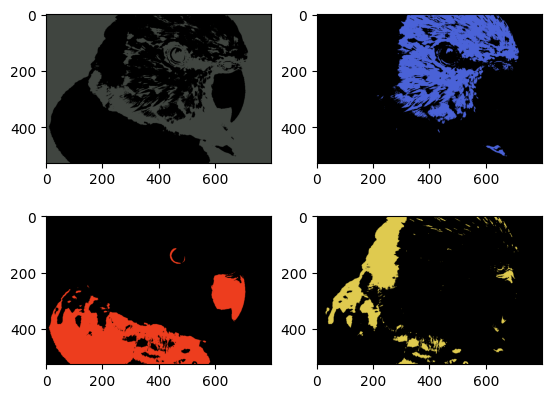

In [177]:
plt.subplot(2,2,1)
plt.imshow(cluster_mask_img1[0])
plt.subplot(2,2,2)
plt.imshow(cluster_mask_img1[1])
plt.subplot(2,2,3)
plt.imshow(cluster_mask_img1[2])
plt.subplot(2,2,4)
plt.imshow(cluster_mask_img1[3])

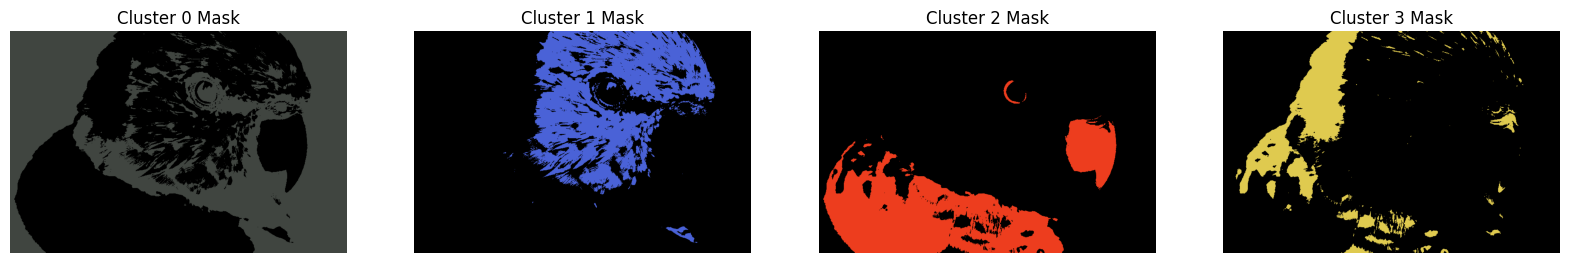

In [178]:
plt.figure(figsize=(20,20))
for i, mask_img in enumerate(cluster_mask_img1):
  plt.subplot(1,k,i+1)
  plt.imshow(mask_img)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

In [179]:
merged_mask1 = cluster_masks1[0] | cluster_masks1[1] | cluster_masks1[2]
merged_mask_rgb1 = np.zeros_like(bird_rgb)
merged_mask_rgb1[merged_mask1] = bird_rgb[merged_mask1]

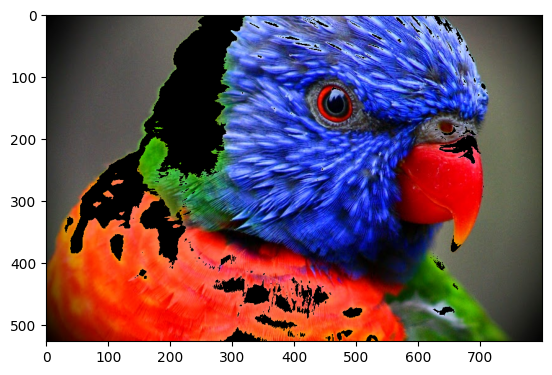

In [180]:
plt.imshow(merged_mask_rgb1)

4. Perform appropriate morphological operations to refine the segmentation results.

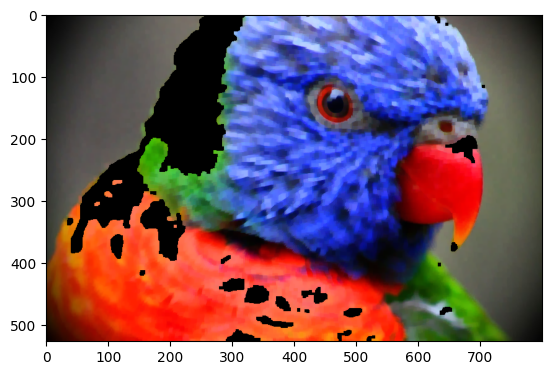

In [181]:
kernel = np.ones((3,3))
closing = cv2.morphologyEx(merged_mask_rgb1, cv2.MORPH_CLOSE, kernel, iterations=2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening)

5. Import image "fruits_segment.png" image using cv2

In [182]:
fruit = cv2.imread("/content/drive/MyDrive/colab for cvr/fruits_segment.png")

6. Convert image from BGR to RGB.

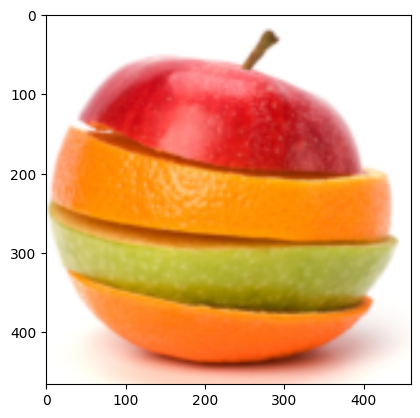

In [183]:
fruit_rgb = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB)
plt.imshow(fruit_rgb)

7. Separate the different fruits region from the image using clustering segmentation approach and Perform appropriate morphological operations to refine the segmentation results.

In [184]:
data2 = fruit_rgb.reshape((-1,3))
data2 = np.float32(data2)

In [185]:
criteria2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [186]:
compact2, labels2, centers2 = cv2.kmeans(data2, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [187]:
segmented_labels2 = labels2.reshape(fruit_rgb.shape[0], fruit_rgb.shape[1])

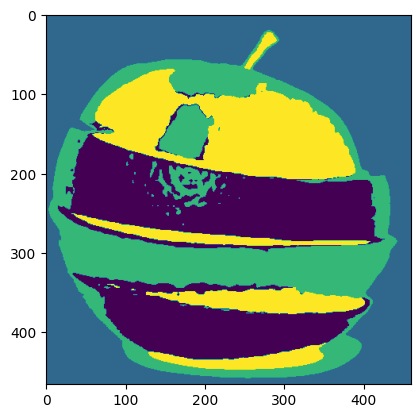

In [188]:
plt.imshow(segmented_labels2)

In [189]:
cluster_masks2 = []
for i in range(k):
  mask2 = (segmented_labels2 == i)
  cluster_masks2.append(mask2)

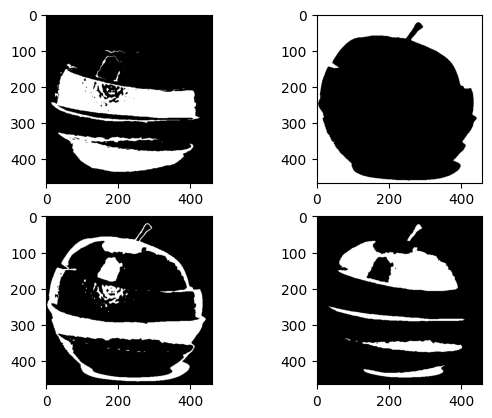

In [190]:
plt.subplot(2,2,1)
plt.imshow(cluster_masks2[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(cluster_masks2[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(cluster_masks2[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(cluster_masks2[3], cmap='gray')

In [191]:
cluster_mask_img2 = []
for i, mask in enumerate(cluster_masks2):
  cluster_color2 = centers2[i]
  cluster_mask_rgb2 = np.zeros_like(fruit_rgb)
  cluster_mask_rgb2[mask] = cluster_color2
  cluster_mask_img2.append(cluster_mask_rgb2)

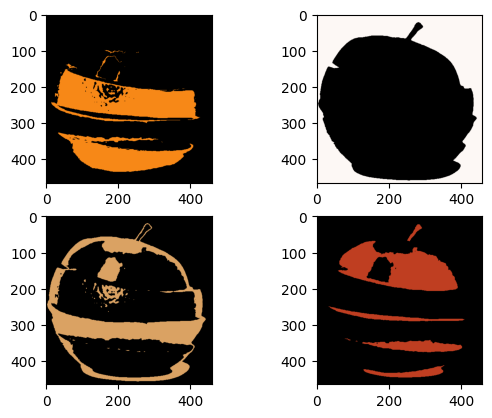

In [192]:
plt.subplot(2,2,1)
plt.imshow(cluster_mask_img2[0])
plt.subplot(2,2,2)
plt.imshow(cluster_mask_img2[1])
plt.subplot(2,2,3)
plt.imshow(cluster_mask_img2[2])
plt.subplot(2,2,4)
plt.imshow(cluster_mask_img2[3])

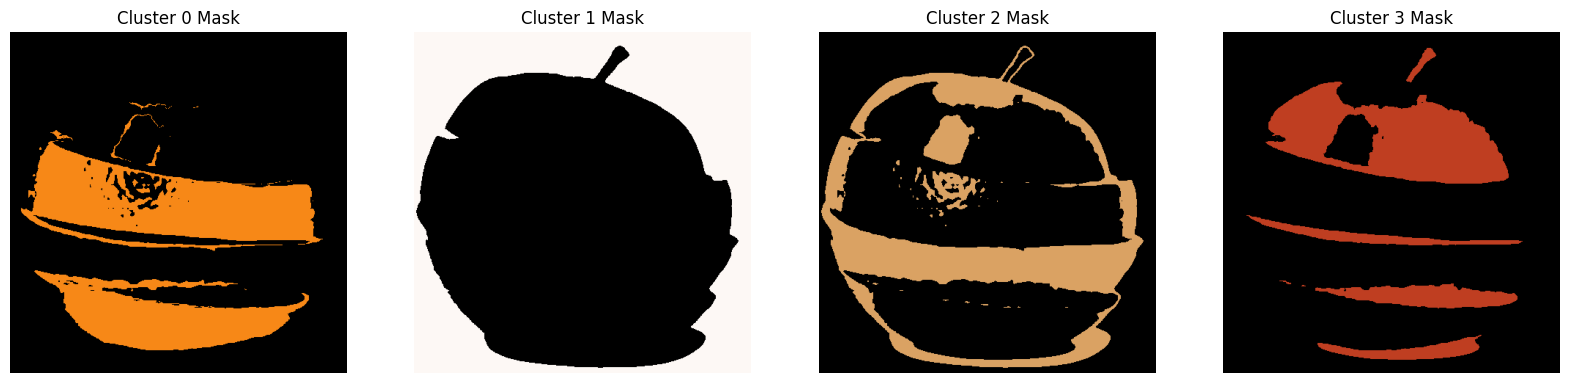

In [193]:
plt.figure(figsize=(20,20))
for i, mask_img in enumerate(cluster_mask_img2):
  plt.subplot(1,k,i+1)
  plt.imshow(mask_img)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

In [200]:
merged_mask2 = cluster_masks2[0] | cluster_masks2[2] | cluster_masks2[3]
merged_mask_rgb2 = np.zeros_like(fruit_rgb)
merged_mask_rgb2[merged_mask2] = fruit_rgb[merged_mask2]

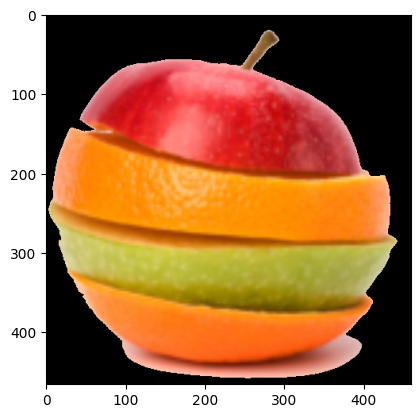

In [201]:
plt.imshow(merged_mask_rgb2)

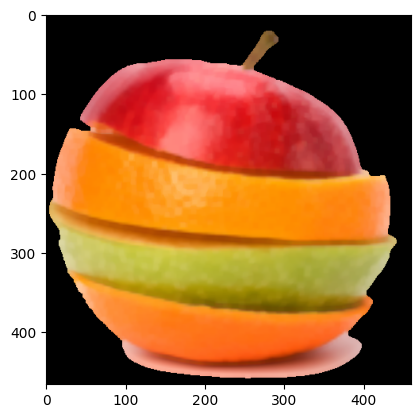

In [202]:
kernel = np.ones((3,3))
closing = cv2.morphologyEx(merged_mask_rgb2, cv2.MORPH_CLOSE, kernel, iterations=2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening)

#**Conclusion:**
We performed and learnt Colour Image Segmentation using clustering techniques